In [ ]:
#!pip install contextily

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')
import contextily as ctx

In [ ]:
#Import dataset (processed)
landsat_7 = pd.read_csv('landsat_7.csv')
landsat_8 = pd.read_csv('landsat_8.csv')
merged_data = pd.read_csv('merged_data.csv')
salinity = pd.read_csv('salinity_df.csv')
station = pd.read_csv('station_with_id.csv')

# Salinity analysis

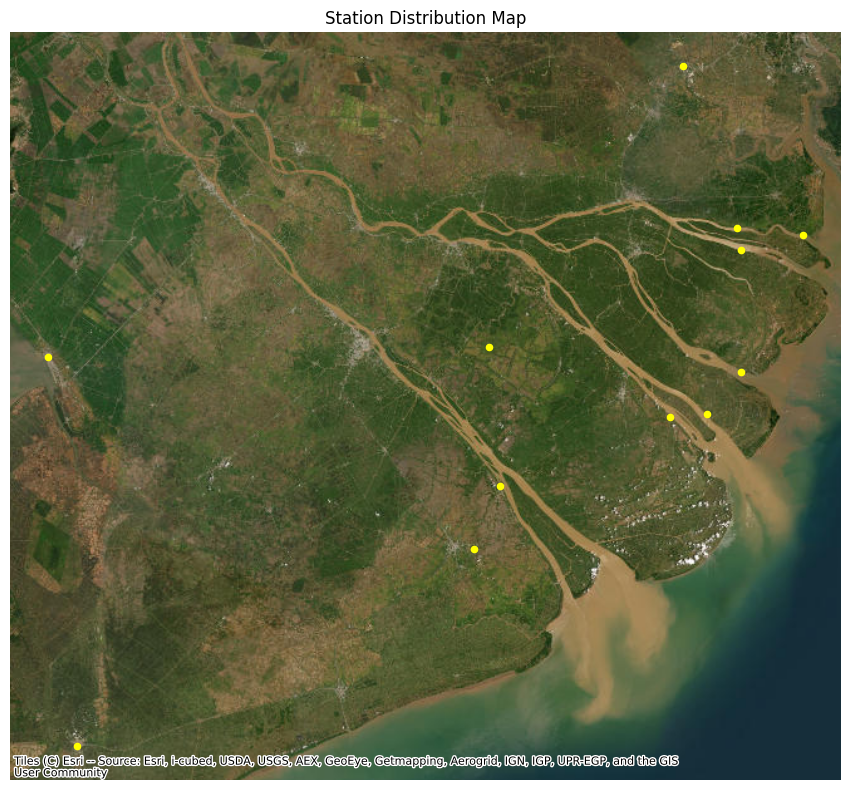

In [ ]:
# Convert to GeoDataFrame (WGS84)
gdf = gpd.GeoDataFrame(station, geometry=gpd.points_from_xy(station['Longitude'], station['Latitude']), crs="EPSG:4326")

# Reproject to Web Mercator for contextily
gdf = gdf.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='yellow', markersize=20)

# Add station labels
#for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['id']):
#    ax.text(x + 5000, y + 5000, label, fontsize=12)

# ✅ Add Satellite Basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

# Format
ax.set_axis_off()
plt.title("Station Distribution Map")
plt.tight_layout()
plt.savefig("station_map_basemap.png", dpi=300)
plt.show()

In [ ]:
merged_salinity = pd.merge(salinity, station, on='Station')
merged_salinity

,Station,date,1,3,5,7,9,11,13,15,...,19,21,23,min,max,mean,median,Latitude,Longitude,id
0,An_Thuan_Ben_Tre,2014-03-01,11.7,15.5,8.2,4.8,3.2,1.1,0.8,1.8,...,6.3,4.6,2.2,0.8,15.5,6.021429,4.800000,9.980203,106.601953,1
1,An_Thuan_Ben_Tre,2014-04-01,5.8,10.6,14.2,4.9,2.4,1.2,0.6,2.3,...,9.7,7.2,2.9,0.6,14.2,5.807143,4.900000,9.980203,106.601953,1
2,An_Thuan_Ben_Tre,2014-05-01,1.9,5.8,7.2,8.1,3.5,1.7,0.5,2.6,...,10.0,6.5,3.8,0.5,10.0,4.842857,4.842857,9.980203,106.601953,1
3,An_Thuan_Ben_Tre,2014-06-01,2.3,3.2,6.1,7.9,4.2,1.9,0.4,1.7,...,7.7,5.1,3.8,0.4,7.9,3.992857,3.800000,9.980203,106.601953,1
4,An_Thuan_Ben_Tre,2014-09-01,4.2,2.5,1.9,2.2,3.4,3.9,3.5,3.0,...,4.2,9.5,10.6,1.9,10.6,4.650000,3.700000,9.980203,106.601953,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,Vam_Kenh_Tien_Giang,2018-06-22,4.0,1.9,0.6,3.1,6.8,8.8,8.2,7.1,...,1.4,4.8,6.0,0.6,8.8,4.650000,4.650000,10.274361,106.737150,12
6707,Vam_Kenh_Tien_Giang,2018-06-23,5.4,3.1,1.5,4.1,7.5,6.7,6.0,6.9,...,0.4,3.2,6.1,0.4,7.5,4.371429,4.371429,10.274361,106.737150,12
6708,Vam_Kenh_Tien_Giang,2018-06-24,6.6,4.7,2.0,4.1,6.2,8.0,6.5,8.1,...,3.1,0.2,4.1,0.2,8.1,4.878571,4.878571,10.274361,106.737150,12
6709,Vam_Kenh_Tien_Giang,2018-06-29,4.1,6.1,8.0,6.6,4.9,3.8,6.5,7.5,...,4.4,2.8,0.0,0.0,8.0,4.892857,4.900000,10.274361,106.737150,12


In [ ]:
station_stats = merged_salinity.groupby(['id', 'Latitude', 'Longitude'])['mean'].agg(['mean', 'count']).reset_index()
station_stats.columns = ['id', 'Latitude', 'Longitude', 'Mean_Salinity', 'Observation_Count']

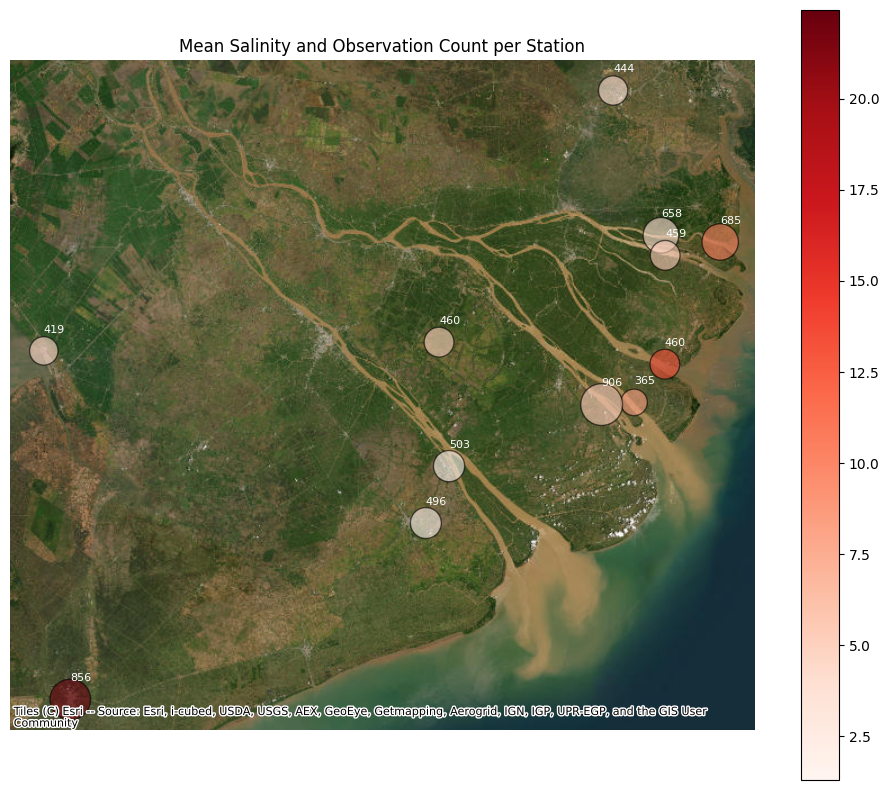

In [ ]:
gdf = gpd.GeoDataFrame(
    station_stats,
    geometry=gpd.points_from_xy(station_stats['Longitude'], station_stats['Latitude']),
    crs="EPSG:4326"
).to_crs(epsg=3857)

# Step 3: Plot
fig, ax = plt.subplots(figsize=(12, 10))

gdf.plot(
    ax=ax,
    column='Mean_Salinity',
    cmap='Reds',
    markersize=gdf['Observation_Count'],  # adjust if too small/large
    legend=True,
    alpha=0.6,
    edgecolor='black'
)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

# Add station labels
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Observation_Count']):
    ax.text(x, y + 5000, label, fontsize=8, color='white')

ax.set_title('Mean Salinity and Observation Count per Station')
ax.axis('off')
plt.show()

In [ ]:
merged_salinity['date'] = pd.to_datetime(merged_salinity['date'])
merged_salinity['Year'] = merged_salinity['date'].dt.year

In [ ]:
trend = merged_salinity.groupby(['Station', 'Year'])['mean'].mean().reset_index()

In [ ]:
# Create 'YearMonth' column
merged_salinity['YearMonth'] = merged_salinity['date'].dt.to_period('M').astype(str)

In [ ]:
monthly_trend = merged_salinity.groupby(['Station', 'YearMonth'])['mean'].mean().reset_index()

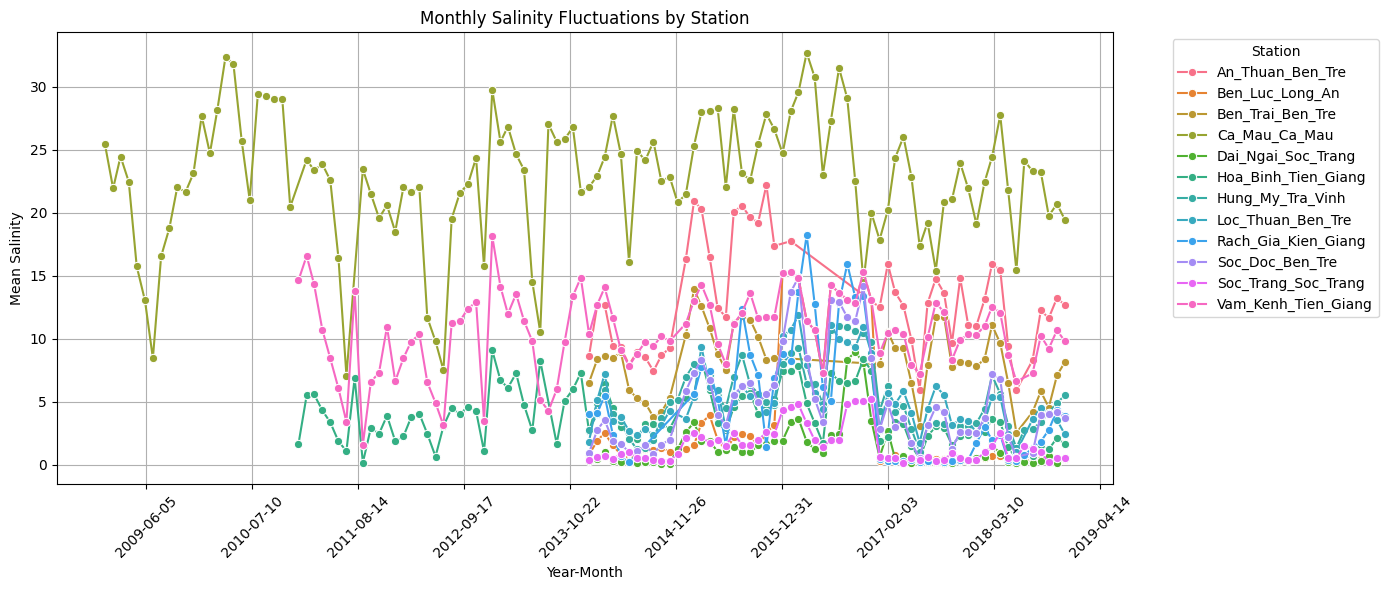

In [ ]:
monthly_trend['YearMonth'] = pd.to_datetime(monthly_trend['YearMonth'])

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trend, x='YearMonth', y='mean', hue='Station', marker='o')

plt.title('Monthly Salinity Fluctuations by Station')
plt.ylabel('Mean Salinity')
plt.xlabel('Year-Month')

# Auto format x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=12))  # ~12 evenly spaced ticks
plt.xticks(rotation=45)

plt.grid(True)
plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
merged_salinity['Month'] = merged_salinity['date'].dt.month

In [ ]:
# Step 2: Group by Station, Year, and Month
monthly_pattern = merged_salinity.groupby(['Station', 'Year', 'Month'])['mean'].mean().reset_index()

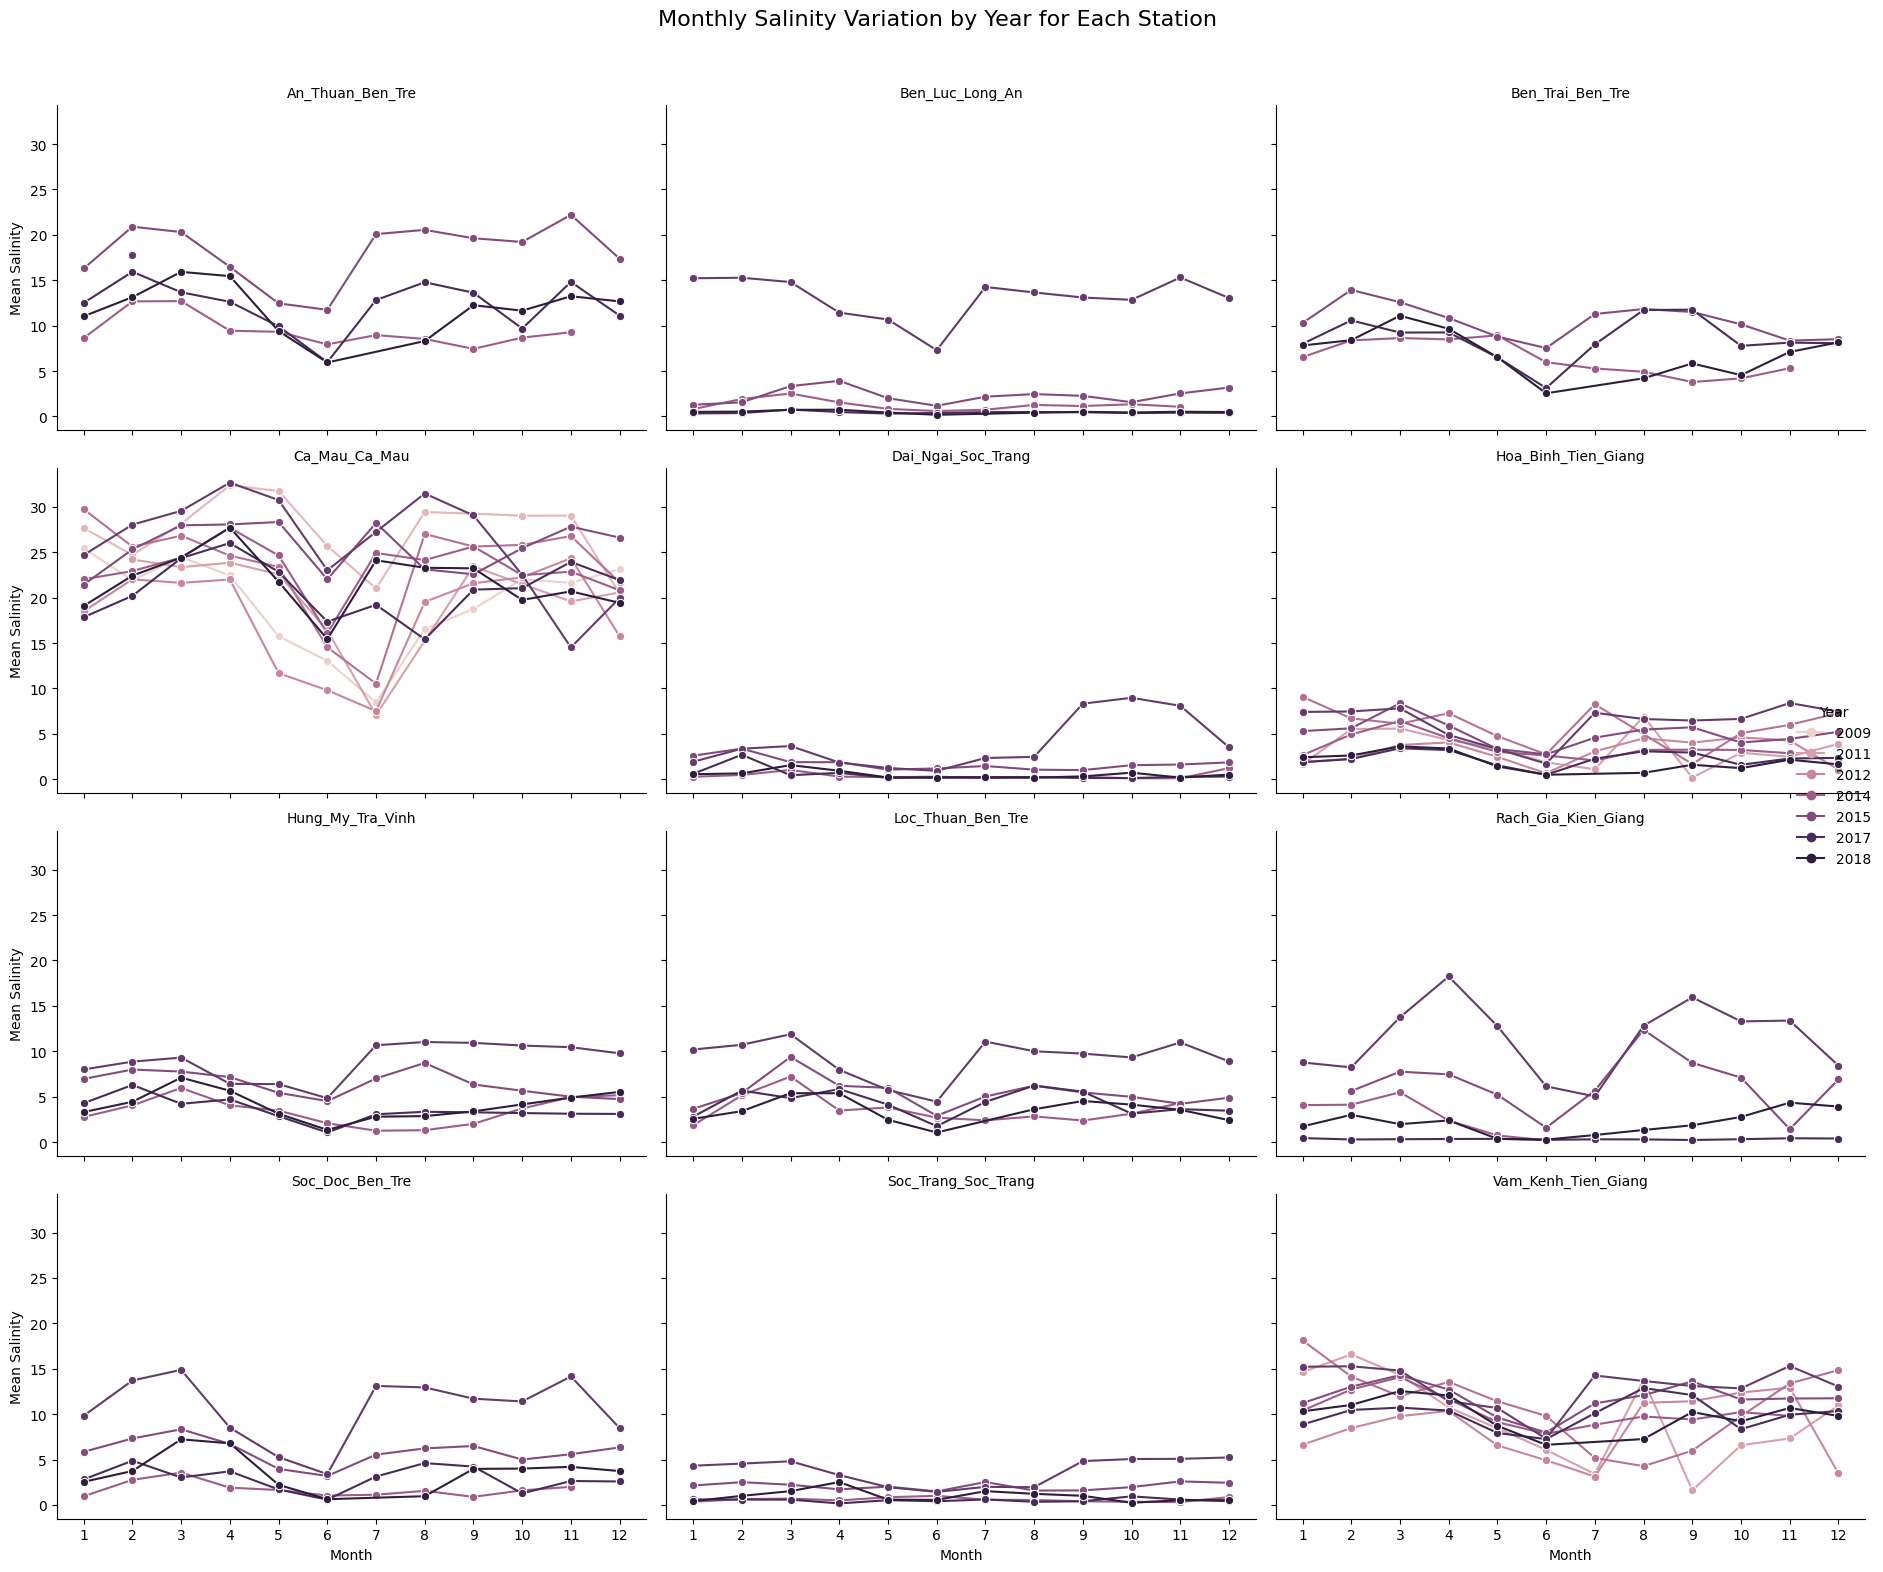

In [ ]:
g = sns.relplot(
    data=monthly_pattern,
    x='Month', y='mean',
    hue='Year', kind='line',
    col='Station', col_wrap=3,
    height=4, aspect=1.5,
    marker='o'
)

g.set_titles('{col_name}')
g.set_axis_labels('Month', 'Mean Salinity')
g.set(xticks=range(1, 13))
g.fig.suptitle('Monthly Salinity Variation by Year for Each Station', fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.92)

In [ ]:
monthly_avg = merged_salinity.groupby('Month')['median'].mean().reset_index()

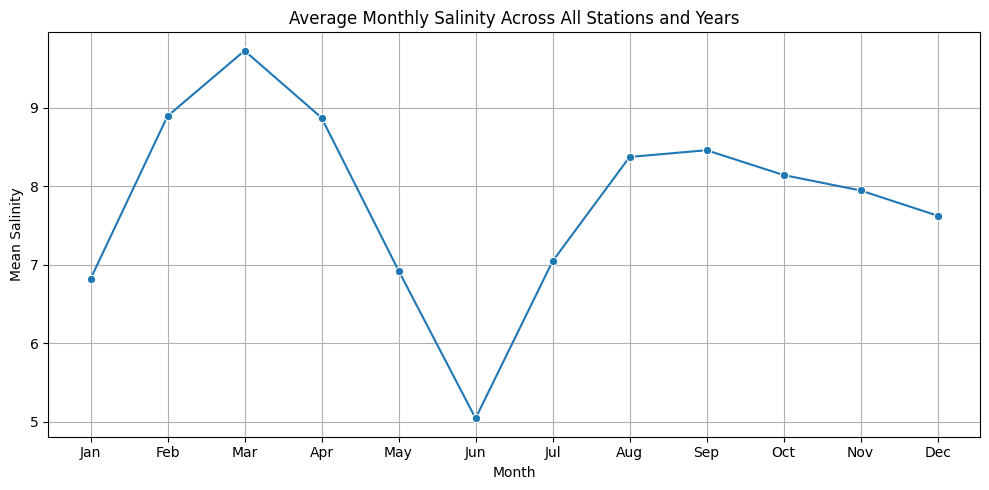

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x='Month', y='median', marker='o')

plt.title('Average Monthly Salinity Across All Stations and Years')
plt.xlabel('Month')
plt.ylabel('Mean Salinity')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='Month', ylabel='Station'>

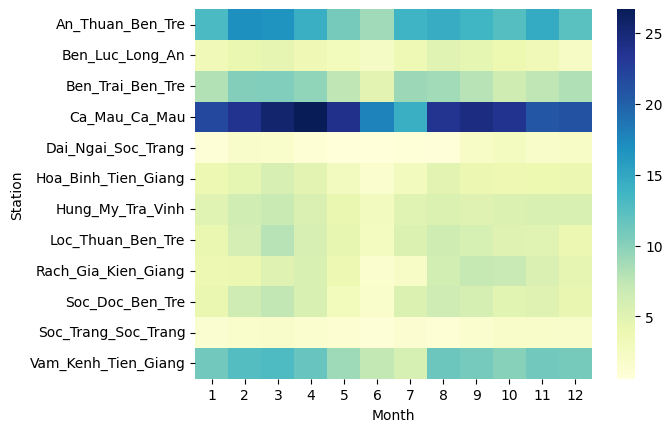

In [ ]:
pivot = merged_salinity.pivot_table(index='Station', columns='Month', values='mean', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu')

<Axes: xlabel='Year', ylabel='Station'>

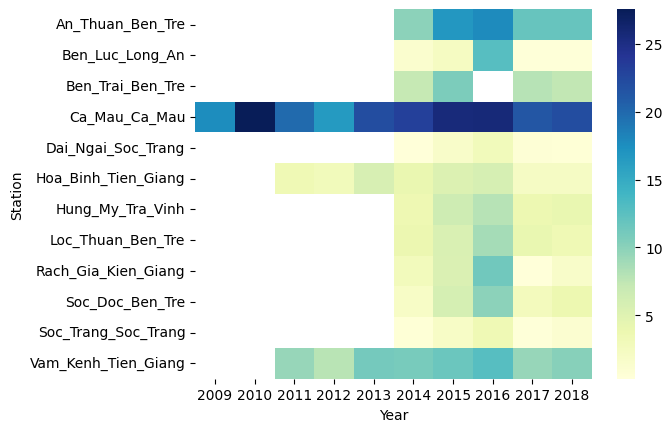

In [ ]:
pivot = merged_salinity.pivot_table(index='Station', columns='Year', values='mean', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu')

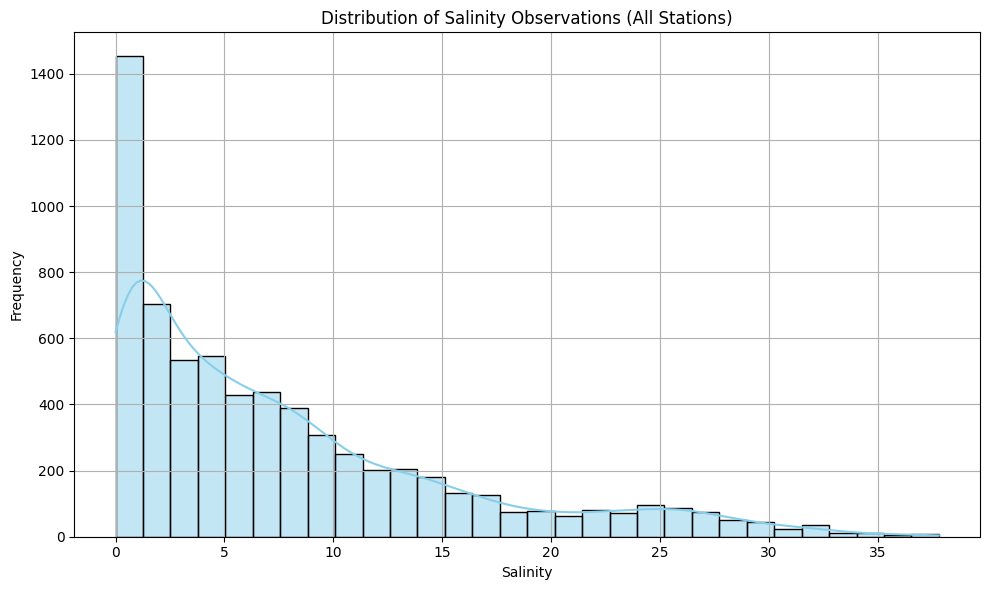

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_salinity, x='mean', bins=30, kde=True, color='skyblue')

plt.title('Distribution of Salinity Observations (All Stations)')
plt.xlabel('Salinity')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

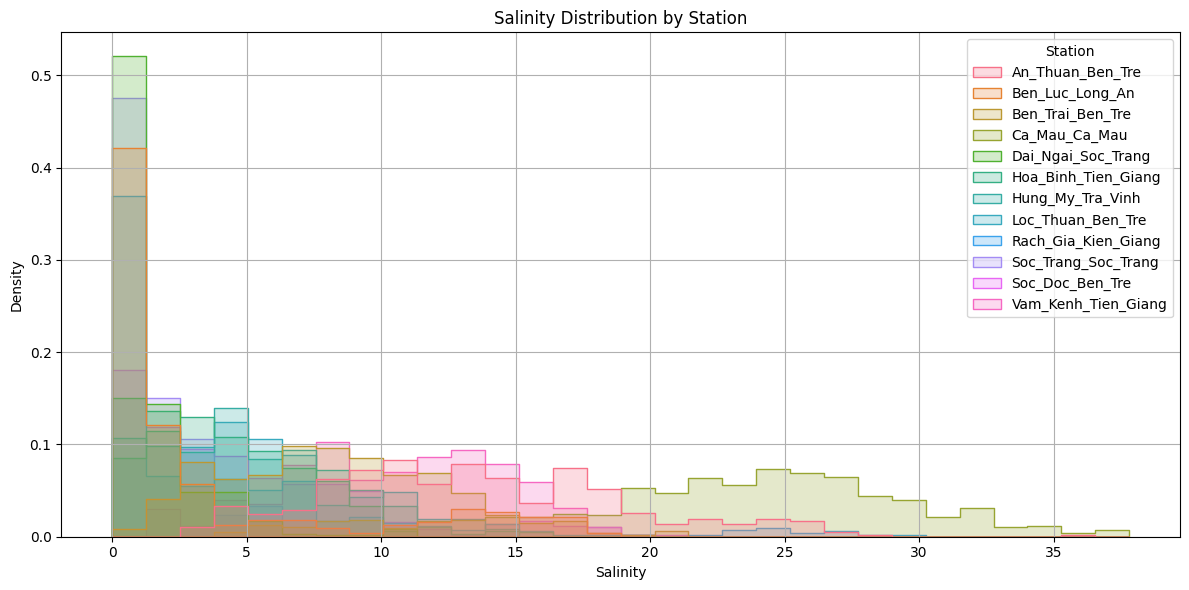

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_salinity, x='mean', hue='Station', element='step', stat='density', common_norm=False, bins=30)

plt.title('Salinity Distribution by Station')
plt.xlabel('Salinity')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

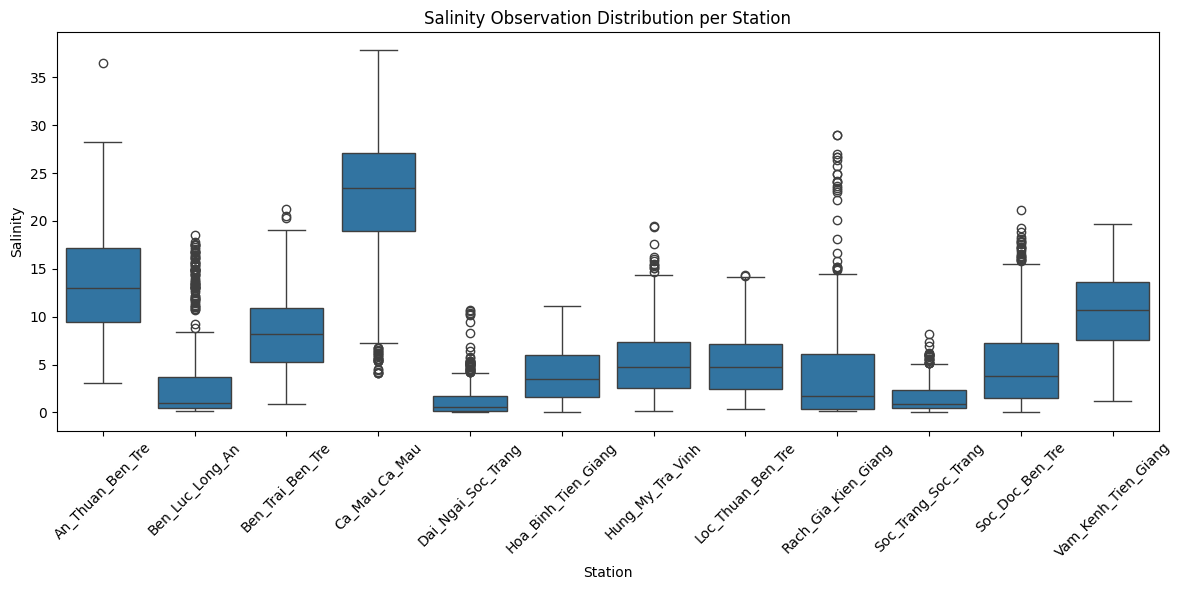

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_salinity, x='Station', y='mean')
plt.xticks(rotation=45)
plt.title('Salinity Observation Distribution per Station')
plt.ylabel('Salinity')
plt.tight_layout()
plt.show()

# Satellite data analysis

## Landsat 7